# Zomata Data Analysis Using Python


# Step-1 Import Necessary Python Libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataframe = pd.read_csv('Zomato data .csv')

In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Converting the data type of the 'rate' column to Float and removing the denominator

In [10]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handlerate)
dataframe.head()


#def handlerate(value)::
#This is a function definition. The function handlerate takes an input argument value and processes it.

#value = str(value).split('/'):

#The input value is first converted to a string using str(value).
#The .split('/') method then splits the string by the character /, creating a list of substrings. For example, if value is "4/5", the result of the split would be ['4', '5'].
#value = value[0]:

#This line selects the first element of the list produced by the split operation (value[0]). In the case of "4/5", value[0] would be "4".
#return float(value):

#The selected element (the first part of the split) is then converted back into a float. So, "4" would be converted to 4.0.
#dataframe['rate'] = dataframe['rate'].apply(handlerate):

#This line applies the handlerate function to each value in the 'rate' column of the dataframe.
#The .apply() method iterates over every element in the 'rate' column and applies the handlerate function to each one.
    

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Summary of the Dataframe 

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Conclusion- There is no NULL value in dataframe

# Type of Restaurant 

Text(0.5, 0, 'Type of Restaurant')

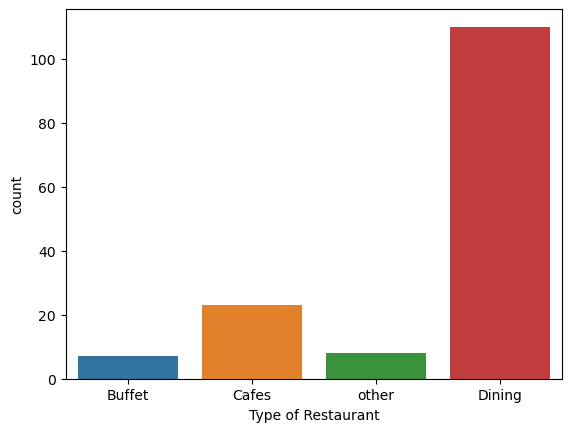

In [14]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

# Conclusion : The majority of Restaurants fall into dining cantegory.

# Dining restaurants are preferred by larger number of customers.

# How many Votes - Restaurant

Text(0, 0.5, 'Votes')

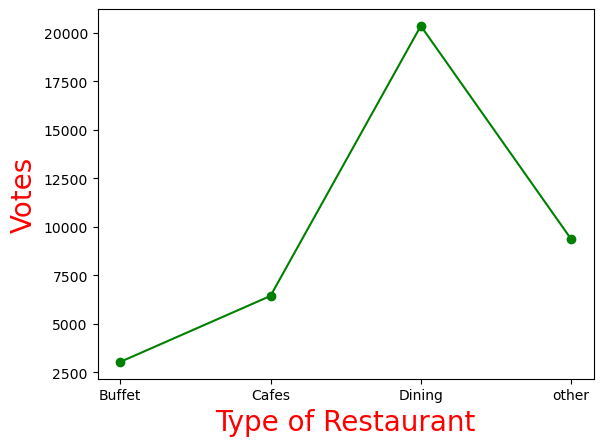

In [20]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")

#This creates a new DataFrame called result from the grouped_data Series. 
#The new DataFrame has one column, 'votes', and the index will be the unique values from the 'listed_in(type)' column.

#c="green": This sets the color of the line to green.
#marker="o": This adds circular markers at each data point on the plot.

plt.xlabel("Type of Restaurant", c='red',size='20')
plt.ylabel("Votes", c='red',size='20')

# Ratings - Majority Restaurant

In [26]:
mean_rating = dataframe.groupby('listed_in(type)').mean()['rate'].sort_values(ascending= False)
mean_rating.head()

listed_in(type)
other     3.912500
Buffet    3.842857
Cafes     3.765217
Dining    3.571818
Name: rate, dtype: float64

# Visualization :

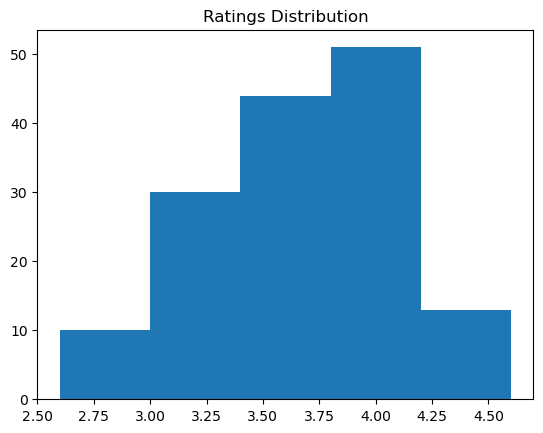

In [27]:
plt.hist(dataframe['rate'], bins = 5)
plt.title("Ratings Distribution")
plt.show()

# Conclusion - Majority of Restaurant recieved ratings between 3.5 to 3.9.

# Couples - Average Spending on Online Orders

In [32]:
couple_avg_spend = dataframe.groupby('approx_cost(for two people)').count().sort_values( by ='approx_cost(for two people)', ascending= False)
couple_avg_spend

,name,online_order,book_table,rate,votes,listed_in(type)
approx_cost(for two people),,,,,,
950,1,1,1,1,1,1
900,2,2,2,2,2,2
850,2,2,2,2,2,2
800,12,12,12,12,12,12
750,3,3,3,3,3,3
700,5,5,5,5,5,5
650,2,2,2,2,2,2
600,13,13,13,13,13,13
550,3,3,3,3,3,3


# Visualization :

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

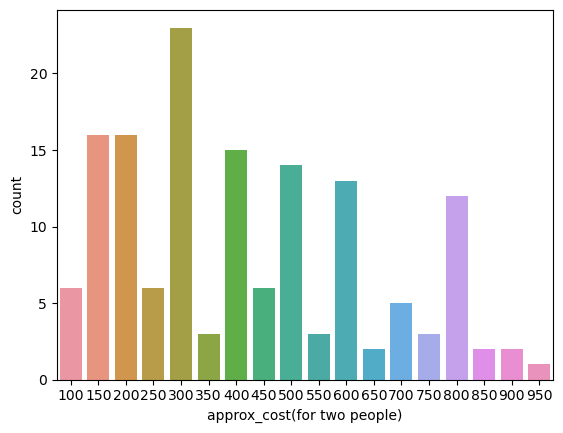

In [36]:

sns.countplot(x=dataframe['approx_cost(for two people)'])

#or 
#couple_data = dataframe['approx_cost(for two people)']
#sns.countplot(x=couple_data)



# Conclusion - Majority of Couples prefer for approximate Cost of Rs.300

In [52]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Which Mode(online/Offline) - Recieved Max Rating

In [46]:
max_rating = dataframe.groupby('online_order').mean().loc[:, ['rate']].sort_values( by ='online_order', ascending= False)
max_rating

# .loc[:, ['rate']]  to show cloumns till rate only.

,rate
online_order,
Yes,3.858621
No,3.487778


# Visualization :

<AxesSubplot:xlabel='online_order', ylabel='rate'>

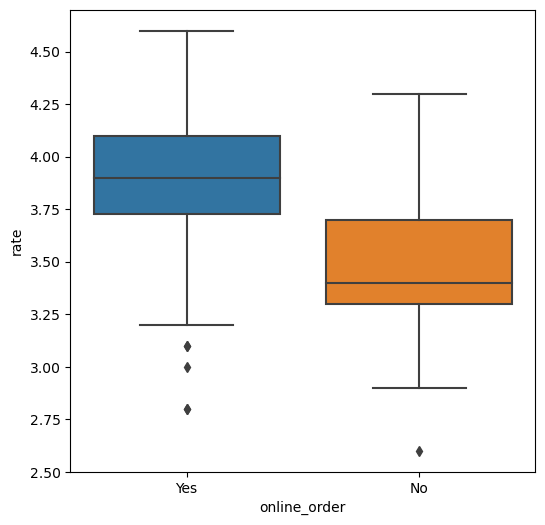

In [50]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y ='rate', data =dataframe)

# Conclusion - Online orders recieve more rating as compared to Offline orders

# Which Type of Restaurent- Recieve more Offline orders.

In [62]:
# Group by 'listed_in(type)' and 'online_order' and count the number of occurrences
order_counts = dataframe.groupby(['listed_in(type)', 'online_order']).size().unstack()

# Display the result
print(order_counts)

#Explanation:
    
#dataframe.groupby(['listed_in(type)', 'online_order']): This groups the data by the type of restaurant (listed_in(type)) and whether the restaurant accepts online orders (online_order).
#.size(): This counts the number of occurrences in each group.
#.unstack(): This pivots the online_order column into separate columns (Yes and No) for easier comparison.


online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6
